<a href="https://colab.research.google.com/github/nizarihsan/UAS_PCD/blob/main/Crack_Datection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install keras

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import warnings
import kagglehub
warnings.filterwarnings('ignore')

In [ ]:
import os
import cv2
import numpy as np

labels = ['Negative', 'Positive']
img_size = 120

def read_images(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                if img_arr is None:
                    continue  # Skip jika gambar tidak bisa dibaca

                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(f"Error pada gambar {img}: {e}")

    return np.array(data, dtype=object)  # Menjaga bentuk array tetap konsisten

data_dir = '/content/drive/MyDrive/CrackDetection/CrackDetection'
Dataset = read_images(data_dir)

Text(0.5, 1.0, 'Number of Images')

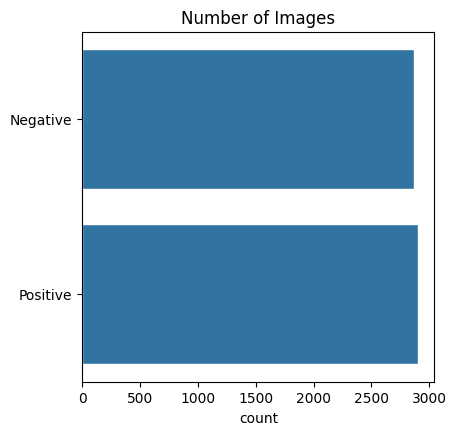

In [ ]:
Im = []
for i in Dataset:
    if(i[1] == 0):
        Im.append("Negative")
    elif(i[1] == 1):
        Im.append("Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(Im)
axl.set_title("Number of Images")

In [ ]:
x = []
y = []

for feature, label in Dataset:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x / 255
y = np.array(y)

(-0.5, 119.5, 119.5, -0.5)

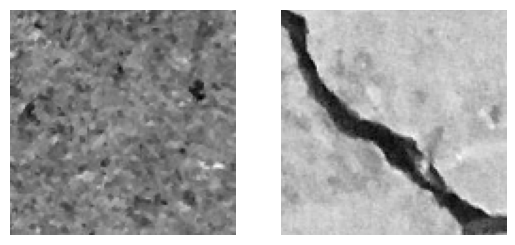

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(x[150].reshape(img_size, img_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x[3000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')

In [ ]:
model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape = x.shape[1:]))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 120, 120, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 60, 60, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       7,373,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,486,018 (28.56 MB)

 Trainable params: 7,485,506 (28.55 MB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Gunakan 'learning_rate' sebagai pengganti 'lr'
opt = Adam(learning_rate=1e-5)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(x, y, epochs=15, batch_size=128, validation_split=0.25, verbose=1)


Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 268s 8s/step - accuracy: 0.5951 - loss: 0.6872 - val_accuracy: 0.0021 - val_loss: 0.7405
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 312s 8s/step - accuracy: 0.8031 - loss: 0.4583 - val_accuracy: 0.8952 - val_loss: 0.6533
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 268s 8s/step - accuracy: 0.8929 - loss: 0.3295 - val_accuracy: 0.8994 - val_loss: 0.6221
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 309s 8s/step - accuracy: 0.9436 - loss: 0.2302 - val_accuracy: 0.9625 - val_loss: 0.5610
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 257s 8s/step - accuracy: 0.9487 - loss: 0.1834 - val_accuracy: 0.9535 - val_loss: 0.5089
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 260s 7s/step - accuracy: 0.9530 - loss: 0.1653 - val_accuracy: 0.9792 - val_loss: 0.4317
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 279s 8s/step - accuracy: 0.9662 - loss: 0.1184 - val_accuracy: 0.9611 - val_loss: 0.3954
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 251s 7s/step - accuracy: 0.9699 - loss: 0.1147 - val_accuracy: 0.9403 - v

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


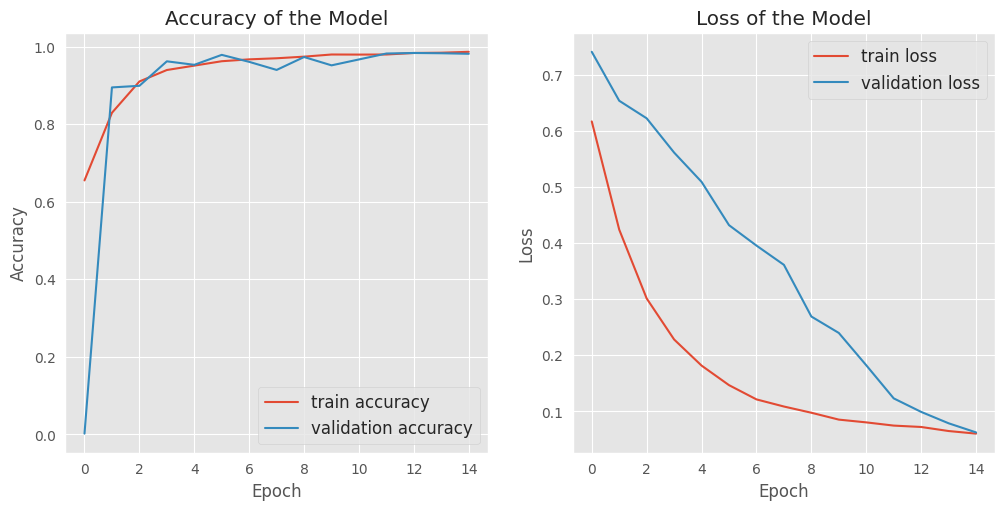

In [ ]:
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Mendapatkan prediksi probabilitas dari model
predictions = model.predict(x)

# Mengonversi probabilitas menjadi kelas prediksi (index dengan probabilitas tertinggi)
predictions = np.argmax(predictions, axis=1)

# Mencetak classification report dan confusion matrix
print(classification_report(y, predictions, target_names=['Negative', 'Positive']))
print(confusion_matrix(y, predictions))


181/181 ━━━━━━━━━━━━━━━━━━━━ 91s 501ms/step
              precision    recall  f1-score   support

    Negative       0.98      0.99      0.99      2864
    Positive       0.99      0.98      0.99      2900

    accuracy                           0.99      5764
   macro avg       0.99      0.99      0.99      5764
weighted avg       0.99      0.99      0.99      5764

[[2837   27]
 [  52 2848]]


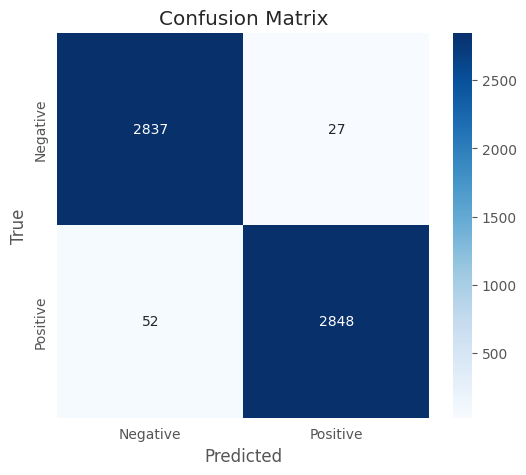

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y, predictions)

# Menampilkan confusion matrix menggunakan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()